<a href="https://colab.research.google.com/github/hunterblum/MLFinal/blob/main/Group2_ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real vs. Fake Job Classification
Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from google.colab import files
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from wordcloud import WordCloud
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import model_selection, naive_bayes, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [18]:
#Download 'stopwords'
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Import original data set

In [4]:
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


Read in uploaded data

In [5]:
Job = pd.read_csv('fake_job_postings.csv')
Job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Data Read in For Local Jupyter Notebook

In [ ]:
Job = pd.read_csv('C:\\Users\\HunterBlum\\OneDrive\\School\\SanDiego\\Courses\\MLDL\\fake_job_postings.csv')
Job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## EDA
### Structure of Data
Shape

In [6]:
Job.shape

(17880, 18)

NAs by feature

In [7]:
Job.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

NAs by row

In [8]:
NA_row = []
for i in range(len(Job.index)):
  na_temp = Job.iloc[i].isnull().sum()
  NA_row.append({'row': i+1, 'NAs': na_temp})

NA_row = pd.DataFrame(NA_row)
NA_row = NA_row.sort_values('NAs', ascending=False)
NA_row

,row,NAs
11077,11078,11
144,145,11
16627,16628,11
17756,17757,11
2315,2316,11
...,...,...
15825,15826,0
11435,11436,0
11441,11442,0
15789,15790,0


Data Types

In [9]:
Job.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

Unique Observations

In [10]:
Job.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

Label Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fraudulent Distribution (1 = Fraud)')

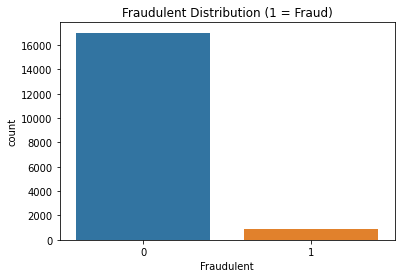

In [ ]:
labels = Job['fraudulent']


sns.countplot(labels)
plt.xlabel("Fraudulent")
plt.title("Fraudulent Distribution (1 = Fraud)")

By Count

In [11]:
Label_count = Job.groupby(['fraudulent'])['fraudulent'].count()
print(Label_count)

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64


NAs effect on fraud

Text(0.5, 0, 'Fraudulent (1 = Fraud)')

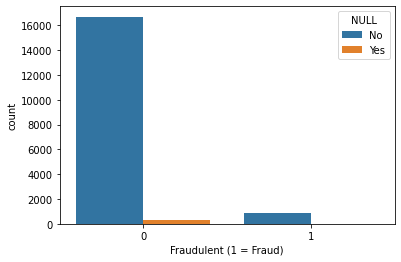

In [12]:
Job_null = pd.DataFrame()
Job_null['NULL'] = np.where(Job['location'].isnull(), "Yes", "No")
Job_null['Fraudulent'] = Job['fraudulent']
sns.countplot(x="Fraudulent", hue="NULL", data=Job_null)
plt.xlabel("Fraudulent (1 = Fraud)")

Fill NAs with " " so our strings don't delete when combined

In [13]:
Job.fillna(" ", inplace = True)

## Creating Text Dataset


In [14]:
# Not keeping non-text variables in Job_corpus, we can add them back later
Job_corpus = pd.DataFrame()
Job_corpus['fraudulent'] = Job['fraudulent']
Job_corpus['corpus'] = Job['title'] + ' ' + Job['location'] + ' ' + Job['department'] + ' ' + Job['company_profile'] + ' ' + Job['description'] + ' ' + Job['requirements'] + ' ' + Job['benefits'] + ' ' + Job['employment_type'] + ' ' + Job['required_education'] + ' ' + Job['industry'] + ' ' + Job['function']

### Cleaning the corpus variable
Lowercase

In [15]:
Job_corpus['corpus'] = Job_corpus['corpus'].str.lower()

Remove unicode characters

In [16]:
corpus_uni = []
for ind in Job_corpus.index:
  x = Job_corpus['corpus'][ind]
  temp = x.encode('ascii', 'ignore').decode()
  corpus_uni.append(temp)

Job_corpus['corpus'] = corpus_uni


Remove Stop words

In [19]:
stop = stopwords.words("english")
corpus_stop = []
for ind in Job_corpus.index:
  x = Job_corpus['corpus'][ind]
  temp = ' '.join([word for word in x.split(' ') if word not in stop])
  corpus_stop.append(temp)

Job_corpus['corpus'] = corpus_stop

Create word cloud


In [20]:
# Split true and false fraud
Fraud = Job_corpus[(Job_corpus['fraudulent'] == 1)]
Real = Job_corpus[(Job_corpus['fraudulent'] == 0)]

# Create bag of words
Fraud_words = ''
for ind in Fraud.index:
  string = str(Fraud['corpus'][ind])
  token = string.split()
  Fraud_words += " ".join(token)+" "

Real_words = ''
for ind in Real.index:
  string = str(Real['corpus'][ind])
  token = string.split()
  Real_words += " ".join(token)+" "


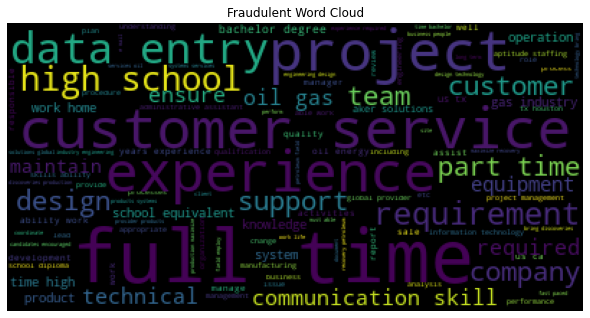

In [21]:
cloud_fraud = WordCloud().generate(Fraud_words)
plt.figure(figsize= (8,8))
plt.imshow(cloud_fraud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Fraudulent Word Cloud")
plt.show()

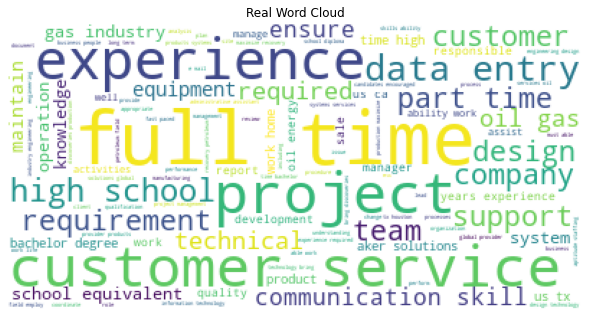

In [22]:
color_real = WordCloud(background_color='white').generate(Fraud_words)
plt.figure(figsize= (8,8))
plt.imshow(color_real)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Real Word Cloud")
plt.show()

Run Vectorizer

In [23]:
# Drop the fraud variaable
Job_corpus = Job_corpus.drop(columns = ['fraudulent'])
vectorizer = TfidfVectorizer()
spmat = vectorizer.fit_transform(Job_corpus['corpus'])
feat_names = vectorizer.get_feature_names()
Job_corpus = pd.DataFrame.sparse.from_spmatrix(spmat, columns=feat_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
Job_corpus

,00,000,0000,0001pt,0005,000a,000aed,000annual,000apply,000applying,...,zurich,zus,zusammen,zusammenarbeitest,zusammenbringt,zutrifft,zweig,zylun,zyluns,zynga
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.080592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.0,0.027459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17876,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17877,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17878,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Undersample to balance classes
Create the dataset

In [26]:
X = Job.drop(columns = ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent'])
y = np.array(Job['fraudulent'])

undersample = RandomUnderSampler(random_state = 42)
Job_under, y_under = undersample.fit_resample(X,y)
Job_under['fraudulent'] = y_under

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Fraudulent Distribution (1 = Fraud)')

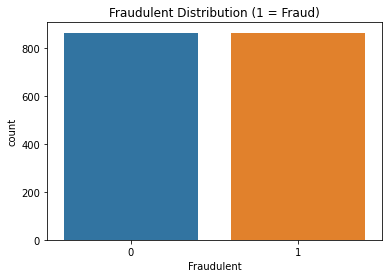

In [27]:
sns.countplot(y_under)
plt.xlabel("Fraudulent")
plt.title("Fraudulent Distribution (1 = Fraud)")

Clean Data like before

In [28]:
# Not keeping non-text variables in Job_corpus, we can add them back later
Job_corpus_under = pd.DataFrame()
Job_corpus_under['fraudulent'] = Job_under['fraudulent']
Job_corpus_under['corpus'] = Job_under['title'] + ' ' + Job_under['location'] + ' ' + Job_under['department'] + ' ' + Job_under['company_profile'] + ' ' + Job_under['description'] + ' ' + Job_under['requirements'] + ' ' + Job_under['benefits'] + ' ' + Job_under['employment_type'] + ' ' + Job_under['required_education'] + ' ' + Job_under['industry'] + ' ' + Job_under['function']

Lowercase

In [29]:
Job_corpus_under['corpus'] = Job_corpus_under['corpus'].str.lower()

Remove unicode

In [30]:
corpus_uni = []
for ind in Job_corpus_under.index:
  x = Job_corpus_under['corpus'][ind]
  temp = x.encode('ascii', 'ignore').decode()
  corpus_uni.append(temp)

Job_corpus_under['corpus'] = corpus_uni


Remove Stopwords

In [31]:
stop = stopwords.words("english")
corpus_stop = []
for ind in Job_corpus_under.index:
  x = Job_corpus_under['corpus'][ind]
  temp = ' '.join([word for word in x.split(' ') if word not in stop])
  corpus_stop.append(temp)

Job_corpus_under['corpus'] = corpus_stop

Wordcloud

In [32]:
# Split true and false fraud
Fraud = Job_corpus_under[(Job_corpus_under['fraudulent'] == 1)]
Real = Job_corpus_under[(Job_corpus_under['fraudulent'] == 0)]

# Create bag of words
Fraud_words = ''
for ind in Fraud.index:
  string = str(Fraud['corpus'][ind])
  token = string.split()
  Fraud_words += " ".join(token)+" "

Real_words = ''
for ind in Real.index:
  string = str(Real['corpus'][ind])
  token = string.split()
  Real_words += " ".join(token)+" "


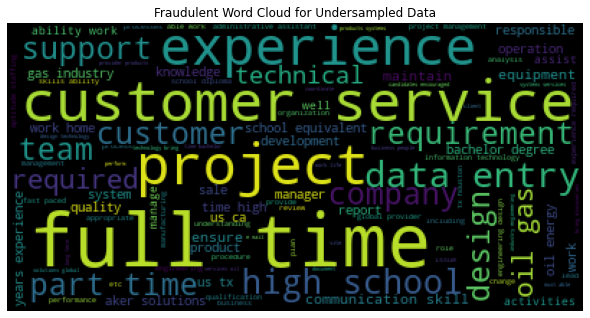

In [33]:
cloud_fraud = WordCloud().generate(Fraud_words)
plt.figure(figsize= (8,8))
plt.imshow(cloud_fraud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Fraudulent Word Cloud for Undersampled Data")
plt.show()

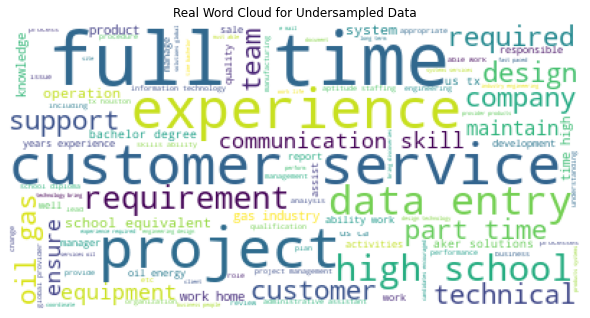

In [34]:
color_real = WordCloud(background_color='white').generate(Fraud_words)
plt.figure(figsize= (8,8))
plt.imshow(color_real)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Real Word Cloud for Undersampled Data")
plt.show()

Run Vectorizer

In [35]:
# Drop the fraud variable
Job_corpus_under = Job_corpus_under.drop(columns = ['fraudulent'])
vectorizer = TfidfVectorizer()
spmat = vectorizer.fit_transform(Job_corpus_under['corpus'])
feat_names = vectorizer.get_feature_names()
Job_corpus_under = pd.DataFrame.sparse.from_spmatrix(spmat, columns=feat_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Separated section dataset

In [36]:
text = Job[['title','location', 'company_profile', 'description', 'requirements', 'benefits']]
text.head()

,title,location,company_profile,description,requirements,benefits
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered


Undersample

In [37]:
# let's look at each text feature
# text features are:
# 'title', 'location', 'company_profile', 'description', 'requirements', 'benefits' and (perhaps) 'industry'
# going to fill text nulls with " " 

text = Job_under[['title','location', 'department', 'company_profile', 'description', 'requirements', 'benefits']]
text.fillna(" ", inplace = True)
text.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,title,location,department,company_profile,description,requirements,benefits
0,SEM Coordinator,"GR, I, Athens",,#URL_c379aa631173ed5b7c345ab3f500a9a053e509138...,The right candidate will be responsible for co...,- Previous experience of minimum 3 years...,- Attractive Remuneration Package.- ...
1,Senior Data Scientist,"GB, LND, London",Engineering,"As a growing and successful startup, Conversoc...",Conversocial builds software that helps compan...,Good working knowledge of Python or similar la...,Salary of £40-55k plus stock options£2k annual...
2,Junior Web Marketing Specialist,"GR, I, Ilion",Web Marketing και Social,Η Atnet Communications A.E. είναι μια αμιγώς ε...,Η Atnet Communications αναζητά Junior Web Mark...,Απαιτούμενα προσόντα:Hands-on εμπειρία στην δι...,H θέση αφορά μόνιμη απασχόληση στην περιοχή το...
3,New Product Development Project Leader - Full ...,"US, GA, Atlanta",,We Provide Full Time Permanent Positions for m...,Coordination and project management of New Pro...,"Location - Atlanta, GA, USAJob Type – Permanen...",
4,Data Intern - Retail & Apparel Analysis,"GB, LND, London",Fashion:Internships,"We build software for fashion retailers, to he...",About EDITDEDITD’s software is the market lead...,,


Vectorizing each text section

In [38]:
# vectorizing title

vectorizer = TfidfVectorizer()
spmat_title = vectorizer.fit_transform(text['title'])
feat_names = vectorizer.get_feature_names_out()
title_corpus = pd.DataFrame.sparse.from_spmatrix(spmat_title, columns=feat_names)

In [39]:
# vectorizing location

vectorizer = TfidfVectorizer()
spmat_location = vectorizer.fit_transform(text['location'])
feat_names = vectorizer.get_feature_names_out()
location_corpus = pd.DataFrame.sparse.from_spmatrix(spmat_location, columns=feat_names)

In [40]:
# vectorizing company_profile

vectorizer = TfidfVectorizer()
spmat_company = vectorizer.fit_transform(text['company_profile'])
feat_names = vectorizer.get_feature_names_out()
company_corpus = pd.DataFrame.sparse.from_spmatrix(spmat_company, columns=feat_names)

In [41]:
# vectorizing description

vectorizer = TfidfVectorizer()
spmat_description = vectorizer.fit_transform(text['description'])
feat_names = vectorizer.get_feature_names_out()
description_corpus = pd.DataFrame.sparse.from_spmatrix(spmat_description, columns=feat_names)


# vectorizing requirements

vectorizer = TfidfVectorizer()
spmat_requirements = vectorizer.fit_transform(text['requirements'])
feat_names = vectorizer.get_feature_names_out()
requirements_corpus = pd.DataFrame.sparse.from_spmatrix(spmat_requirements, columns=feat_names)

# vectorizing benefits

vectorizer = TfidfVectorizer()
spmat_benefits = vectorizer.fit_transform(text['benefits'])
feat_names = vectorizer.get_feature_names_out()
benefits_corpus = pd.DataFrame.sparse.from_spmatrix(spmat_benefits, columns=feat_names)

In [42]:
text_fts = [title_corpus, location_corpus, company_corpus, description_corpus, requirements_corpus, benefits_corpus]


## Creating Categorical Data set

In [43]:
# creating cat_df
# need to import onehotencoder

# cat variables are 

cats = Job_under[['employment_type', 'required_experience', 'required_education', 'function']]

# converting using one hot encoder

ohe = OneHotEncoder(drop = 'first', 
                    sparse = False).fit(cats) # dropping first column of each feature to not reduce redudancy
cat_data = ohe.transform(cats)
cat_df = pd.DataFrame(cat_data, columns = ohe.get_feature_names_out(['employment_type',  'required_experience', 'required_education', 'function'])) 
cat_df.head()

,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Associate,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,...,function_Project Management,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Correlation Matrix

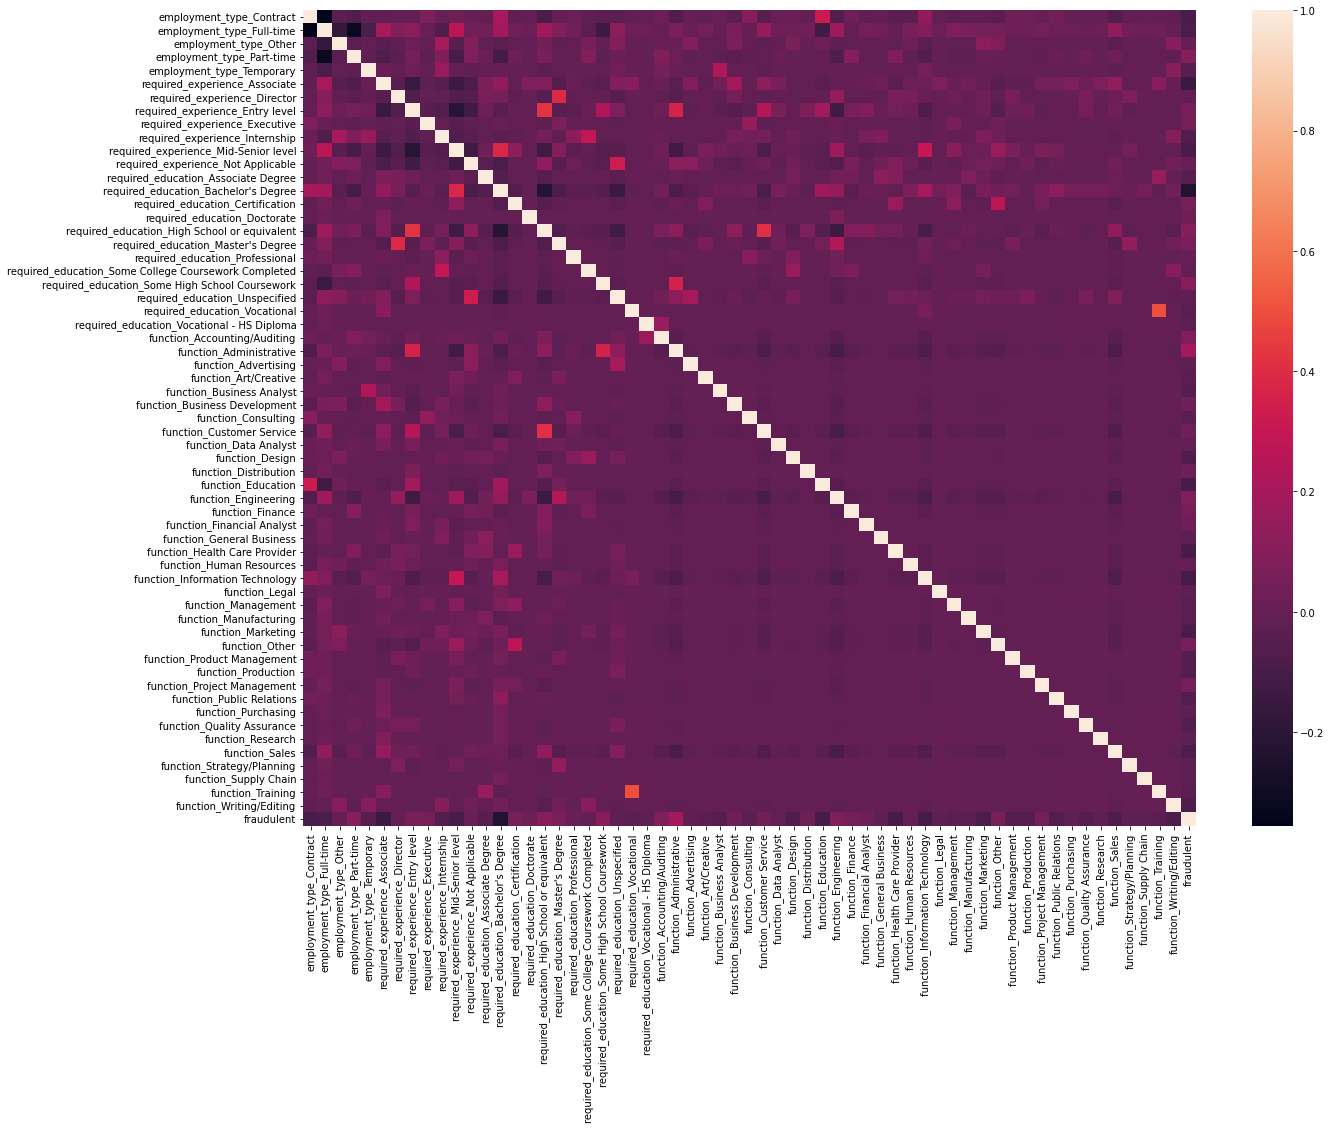

In [44]:
# let's see some correlations between categorical data and the fraudulency

cat_tar = pd.concat([cat_df, Job_under['fraudulent']], axis =1)

plt.figure(figsize = (20,15))
sns.heatmap(cat_tar.corr());

# Modeling

## Perceptrons


### Perceptron with undersampled text section data

In [ ]:
text_fts = [title_corpus, location_corpus, company_corpus, description_corpus, requirements_corpus, benefits_corpus]
labels = y_under
text_ft_accuracy = []

for i  in text_fts:
  X_train, X_test, y_train, y_test = train_test_split(i, labels, test_size = 0.80, random_state=42)
  model = Perceptron(max_iter=3).fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  train_acc = accuracy_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  text_ft_accuracy.append({'training accuracy': train_acc, 'testing accuracy': test_acc})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [ ]:
text_ft_accuracy

[{'testing accuracy': 0.7106782106782107,
  'training accuracy': 0.9595375722543352},
 {'testing accuracy': 0.6240981240981242,
  'training accuracy': 0.8352601156069365},
 {'testing accuracy': 0.8888888888888888,
  'training accuracy': 0.9219653179190751},
 {'testing accuracy': 0.7417027417027418,
  'training accuracy': 0.9884393063583815},
 {'testing accuracy': 0.7301587301587301,
  'training accuracy': 0.9335260115606936},
 {'testing accuracy': 0.6673881673881674,
  'training accuracy': 0.8236994219653179}]

In [ ]:
# running this again, but with top 10, 25, and 50 features
from sklearn.feature_selection import SelectKBest, chi2

k_vals = [10, 25, 50]
text_topft_accuracy = []
for i  in text_fts:
  X_train, X_test, y_train, y_test = train_test_split(i, labels, test_size = 0.80, random_state=42)
  for k in k_vals:
    pipe = make_pipeline(SelectKBest(chi2, k = k), Perceptron(class_weight = 'balanced'))
    pipe.fit(X_train, y_train)
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    cols = pipe[0].get_support(indices = True)
    new_X_features = X_train.iloc[:, cols]
    print('X_new has', k ,'best features: %s' % list(new_X_features.columns.values.tolist()))

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    text_topft_accuracy.append({'Top k features': k, 'Training Accuracy': train_acc, 'Test Accuracy': test_acc})


X_new has 10 best features: ['administrative', 'assistant', 'clerk', 'customer', 'developer', 'entry', 'representative', 'service', 'staff', 'wanted']
X_new has 25 best features: ['abroad', 'administrative', 'android', 'assistant', 'cash', 'clerk', 'cruise', 'customer', 'data', 'developer', 'digital', 'english', 'entry', 'marketing', 'office', 'payroll', 'position', 'representative', 'service', 'software', 'staff', 'teacher', 'urgent', 'wanted', 'web']
X_new has 50 best features: ['000', 'abroad', 'administrative', 'analyst', 'android', 'application', 'architect', 'assistant', 'cash', 'clerical', 'clerk', 'conversational', 'cruise', 'customer', 'data', 'designer', 'developer', 'devops', 'digital', 'driver', 'earn', 'engineering', 'english', 'entry', 'graduates', 'home', 'jobs', 'junior', 'manager', 'marketing', 'office', 'optical', 'payroll', 'position', 'positions', 'receptionist', 'representative', 'service', 'software', 'specialist', 'staff', 'teacher', 'technical', 'ui', 'urgent', 

Order of features: [title_corpus, location_corpus, company_corpus, description_corpus, requirements_corpus, benefits_corpus]

In [ ]:
pd.DataFrame(text_topft_accuracy)

,Top k features,Training Accuracy,Test Accuracy
0,10,0.667630,0.634199
1,25,0.632948,0.552670
2,50,0.774566,0.635642
3,10,0.624277,0.569264
4,25,0.679191,0.643579
5,50,0.736994,0.634921
6,10,0.462428,0.509380
7,25,0.823699,0.779942
8,50,0.869942,0.805195
9,10,0.598266,0.595960


Each text feature seemed to have very accurate results with the data, but only ones like location and benefits had accurate results with limited/most important features

**longer way below, not looped**
first, title_corpus

X_train, X_test, y_train, y_test = train_test_split(title_corpus, labels, test_size = 0.80, random_state=42)
title_model = Perceptron(max_iter=1).fit(X_train, y_train)

title_pred = title_model.predict(X_test)

accuracy = accuracy_score(title_pred, y_test)

text_ft_accuracy = []
text_ft_accuracy.append({'Title': accuracy})

### Perceptron with Categorical Data

In [ ]:
# using these categorical variables to predict 
labels = y_under
X_train, X_test, y_train, y_test = train_test_split(cat_df, labels, test_size = 0.80, random_state=42)

from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy = 'most_frequent') # imputing categorical features with mode
balanced_model = make_pipeline(mode_imputer, Perceptron(class_weight='balanced', random_state = 42))

balanced_model.fit(X_train, y_train)


# make predictions on training set
y_pred_b = balanced_model.predict(X_train)

# make predictions on test set
y_pred_test_b = balanced_model.predict(X_test)

# print the results 
print("Balanced Accuracy:"); print("="*len("Accuracy:"))
print(f"Balanced TRAIN: {accuracy_score(y_train, y_pred_b)}")
print(f"Balanced TEST: {accuracy_score(y_test, y_pred_test_b)}")

Balanced Accuracy:
Balanced TRAIN: 0.6907514450867052
Balanced TEST: 0.6147186147186147


### Perceptron with Undersampled Corpus Data
After running perceptrons on both categorical and text data, let's try to run it on "all" the text data (corpus) and then a combination of seemingly relevant text features and categorical features. First, corpus

Model Creation

In [ ]:
y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus_under.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

perc_all_corpus = []
for i in range(1,15):
  model = Perceptron(max_iter = i).fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  train_acc = accuracy_score(y_train, y_pred_train)
  train_f1 = f1_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  test_f1 = f1_score(y_test, y_pred_test)
  perc_all_corpus.append({"Iterations": i, "Training Accuracy": train_acc, "Training F1": train_f1, "Testing Accuracy": test_acc, "Testing F1": test_f1})

perc_all_corpus = pd.DataFrame(perc_all_corpus)
perc_all_corpus

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

,Iterations,Training Accuracy,Training F1,Testing Accuracy,Testing F1
0,1,0.947977,0.951351,0.826840,0.825581
1,2,0.979769,0.980822,0.853535,0.846329
2,3,0.994220,0.994595,0.860750,0.856292
3,4,0.985549,0.986737,0.829726,0.837017
4,5,0.997110,0.997305,0.854978,0.852531
5,6,1.000000,1.000000,0.860750,0.854119
6,7,1.000000,1.000000,0.860750,0.854119
7,8,1.000000,1.000000,0.860750,0.854119
8,9,1.000000,1.000000,0.860750,0.854119
9,10,1.000000,1.000000,0.860750,0.854119


Save Top Results

In [ ]:
perc_under_corp_acc = perc_all_corpus['Testing Accuracy'].max()
perc_under_corp_f1 = perc_all_corpus['Testing F1'].max()

print("Accuracy:", perc_under_corp_acc, "\nF1 Score:", perc_under_corp_f1)

Accuracy: 0.8607503607503607 
F1 Score: 0.8562918838421444


Tuning Results Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


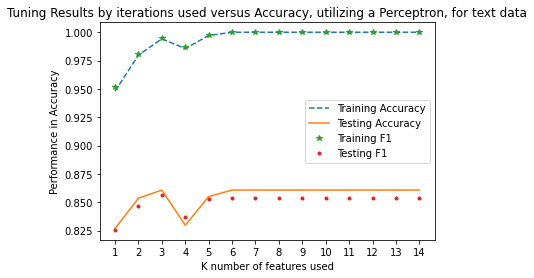

In [ ]:
# here is for both training and testing

plt.plot(perc_all_corpus['Iterations'], perc_all_corpus['Training Accuracy'], '--', label='Training Accuracy')
plt.plot(perc_all_corpus['Iterations'], perc_all_corpus['Testing Accuracy'], label='Testing Accuracy')
plt.plot(perc_all_corpus['Iterations'], perc_all_corpus['Training F1'], '*', label='Training F1')
plt.plot(perc_all_corpus['Iterations'], perc_all_corpus['Testing F1'], '.', label='Testing F1')

plt.xticks(perc_all_corpus['Iterations'])
plt.legend(loc = 'bottom right')
plt.xlabel('K number of features used')
plt.ylabel('Performance in Accuracy')
plt.title("Tuning Results by iterations used versus Accuracy, utilizing a Perceptron, for text data");


### Perceptron with Undersampled Corpus + Categorical Data




In [ ]:
# combining categorical features and text features

# first, choosing text features based on training error
Job_corpus_cat = pd.DataFrame()
Job_corpus_cat['fraudulent'] = Job_under['fraudulent']
Job_corpus_cat['corpus'] = text['title'] + ' ' + text['location'] + ' ' + text['description']

# making all text lower case 
Job_corpus_cat['corpus'] = Job_corpus_cat['corpus'].str.lower()

# vectorizing Job_corpus_under
vectorizer = TfidfVectorizer()
spmat_location = vectorizer.fit_transform(Job_corpus_cat['corpus'])
feat_names = vectorizer.get_feature_names_out()
job_corpus_less = pd.DataFrame.sparse.from_spmatrix(spmat_location, columns=feat_names)

# combining job_corpus_less with cat_df
job_corpus_cat = pd.concat([job_corpus_less, cat_df], axis = 1)

In [ ]:
# now running this on the combined text and categorical data

y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = job_corpus_cat.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

perc_cat_corpus = []
for i in range(1,15):
  model = Perceptron(max_iter = i).fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  train_acc = accuracy_score(y_train, y_pred_train)
  train_f1 = f1_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  test_f1 = f1_score(y_test, y_pred_test)
  perc_cat_corpus.append({"Iterations": i, "Training Accuracy": train_acc, "Training F1": train_f1, "Testing Accuracy": test_acc, "Testing F1": test_f1})

perc_cat_corpus = pd.DataFrame(perc_cat_corpus)
perc_cat_corpus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame

,Iterations,Training Accuracy,Training F1,Testing Accuracy,Testing F1
0,1,0.745665,0.706667,0.687590,0.618502
1,2,0.942197,0.946237,0.754690,0.763231
2,3,0.956647,0.960212,0.733045,0.746575
3,4,0.861272,0.852761,0.724387,0.669550
4,5,0.973988,0.975342,0.769120,0.768452
5,6,0.927746,0.930748,0.728716,0.723122
6,7,0.959538,0.963351,0.732323,0.759871
7,8,0.950867,0.952381,0.757576,0.740741
8,9,0.988439,0.989130,0.778499,0.770037
9,10,0.985549,0.986376,0.784993,0.770769


Get Best Acc and F1

In [ ]:
perc_cat_corp_acc = perc_cat_corpus['Testing Accuracy'].max()
perc_cat_corp_f1 = perc_cat_corpus['Testing F1'].max()

print("Accuracy:", perc_cat_corp_acc, "\nF1 Score:", perc_cat_corp_f1)

Accuracy: 0.79004329004329 
F1 Score: 0.7813673929376408


## AdaBoost

### AdaBoost for Undersampled Corpus

Build Model 

In [ ]:
# first, to run AdaBoost on the all corpus text data
y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus_under.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

n_estimators = [10,25,50,100,150,200]

ada_all_corpus = []
for i in n_estimators:
  model = AdaBoostClassifier(n_estimators = i).fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  train_acc = accuracy_score(y_train, y_pred_train)
  train_f1 = f1_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  test_f1 = f1_score(y_test, y_pred_test)
  ada_all_corpus.append({"Number of estimators": i, "Training Accuracy": train_acc, "Training F1": train_f1, "Testing Accuracy": test_acc, "Testing F1": test_f1})

pd.DataFrame(ada_all_corpus)

,Number of estimators,Training Accuracy,Training F1,Testing Accuracy,Testing F1
0,10,0.843931,0.862944,0.711400,0.739922
1,25,0.939306,0.941504,0.740981,0.741168
2,50,1.000000,1.000000,0.803752,0.807638
3,100,1.000000,1.000000,0.812410,0.814286
4,150,1.000000,1.000000,0.808081,0.813986
5,200,1.000000,1.000000,0.810245,0.816469


In [ ]:
ada_all_corpus_acc = ada_all_corpus['Testing Accuracy'].max()
ada_all_corpus_f1 = ada_all_corpus['Testing F1'].max()

print("Accuracy:", ada_all_corpus_acc, "\nF1 Score:", ada_all_corpus_f1)

Accuracy: 0.8124098124098124 
F1 Score: 0.8164689462665736


Tuning Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


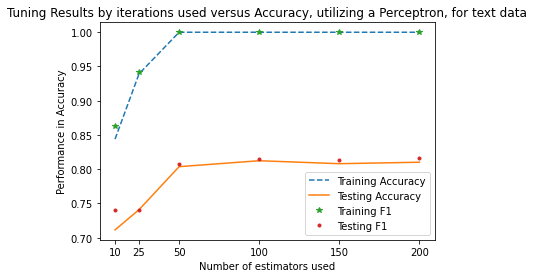

In [ ]:
# here is for both training and testing

ada_all_corpus = pd.DataFrame(ada_all_corpus)
plt.plot(ada_all_corpus['Number of estimators'], ada_all_corpus['Training Accuracy'], '--', label='Training Accuracy')
plt.plot(ada_all_corpus['Number of estimators'], ada_all_corpus['Testing Accuracy'], label='Testing Accuracy')
plt.plot(ada_all_corpus['Number of estimators'], ada_all_corpus['Training F1'], '*', label='Training F1')
plt.plot(ada_all_corpus['Number of estimators'], ada_all_corpus['Testing F1'], '.', label='Testing F1')

plt.xticks(ada_all_corpus['Number of estimators'])
plt.legend(loc = 'bottom right')
plt.xlabel('Number of estimators used')
plt.ylabel('Performance in Accuracy')
plt.title("Tuning Results by iterations used versus Accuracy, utilizing a Perceptron, for text data");

### AdaBoost with undersampled corpus and categorical data

Build Model

In [ ]:
# first, to run AdaBoost on the categorical and text data
y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = job_corpus_cat.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

n_estimators = [10,25,50,100,150,200]

ada_cat_corpus = []
for i in n_estimators:
  model = AdaBoostClassifier(n_estimators = i).fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  train_acc = accuracy_score(y_train, y_pred_train)
  train_f1 = f1_score(y_train, y_pred_train)
  test_acc = accuracy_score(y_test, y_pred_test)
  test_f1 = f1_score(y_test, y_pred_test)
  ada_cat_corpus.append({"Number of estimators": i, "Training Accuracy": train_acc, "Training F1": train_f1, "Testing Accuracy": test_acc, "Testing F1": test_f1})

pd.DataFrame(ada_cat_corpus)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse co

,Number of estimators,Training Accuracy,Training F1,Testing Accuracy,Testing F1
0,10,0.838150,0.851852,0.698413,0.703546
1,25,0.930636,0.934426,0.748196,0.749821
2,50,0.994220,0.994624,0.738817,0.741059
3,100,1.000000,1.000000,0.756133,0.761972
4,150,1.000000,1.000000,0.749639,0.753376
5,200,1.000000,1.000000,0.750361,0.750720


In [ ]:
ada_cat_corpus = pd.DataFrame(ada_cat_corpus)
ada_cat_corpus_acc = ada_cat_corpus['Testing Accuracy'].max()
ada_cat_corpus_f1 = ada_cat_corpus['Testing F1'].max()

print("Accuracy:", ada_cat_corpus_acc, "\nF1 Score:", ada_cat_corpus_f1)

Accuracy: 0.7561327561327561 
F1 Score: 0.7619718309859155


## KNN

### KNN with Undersampled Corpus

KNN Function

In [ ]:
#This function is supposed to create and test a KNN model

def k_neighbors(xtrain, ytrain, xtest, ytest, kvalues, metric):
  knn_accuracy = []
  clfs = []
  for i in kvalues:
    clf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(xtrain, ytrain)
    clf_train_pred = clf.predict(xtrain)
    clf_test_pred = clf.predict(xtest)
    clfs.append(clf)
    knn_accuracy.append({'k values': i,
    'Training Accuracy':accuracy_score(clf_train_pred,ytrain),
    'Training F1': f1_score(clf_train_pred, y_train),
    'Test Accuracy': accuracy_score(clf_test_pred,ytest),
    'Test F1': f1_score(clf_test_pred,ytest)})
  return pd.DataFrame(knn_accuracy), clfs

KNN Modeling and Results

In [ ]:
# running all corpus data through KNN Function / model

y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus_under.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

knn_all_scores, knn_all_clfs = k_neighbors(X_train, y_train, X_test, y_test, range(1, 30, 2), 'euclidean')

knn_all_scores

,k values,Training Accuracy,Training F1,Test Accuracy,Test F1
0,1,1.000000,1.000000,0.833333,0.843602
1,3,0.907514,0.919192,0.816017,0.828051
2,5,0.872832,0.890000,0.787879,0.805298
3,7,0.890173,0.905473,0.788600,0.806089
4,9,0.869942,0.888889,0.793651,0.809079
5,11,0.861272,0.882927,0.786436,0.803453
6,13,0.852601,0.875306,0.784271,0.800534
7,15,0.838150,0.864734,0.759019,0.781699
8,17,0.843931,0.869565,0.751082,0.775828
9,19,0.826590,0.856459,0.744589,0.771022


In [ ]:
knn_all_acc = knn_all_scores['Test Accuracy'].max()
knn_all_f1 = knn_all_scores['Test F1'].max()

print("Accuracy:", knn_all_acc, "\nF1 Score:", knn_all_f1)

Accuracy: 0.8333333333333334 
F1 Score: 0.8436018957345972


Text(0.5, 1.0, 'Tuning Results by K number of neighbors versus Accuracy, \n measured by Euclidean distance metric')

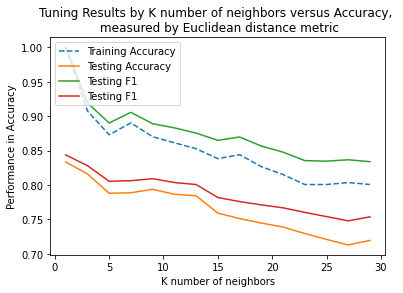

In [ ]:
# Plotting of accuracies training and testing of K-nn with Euclidean metric

plt.plot(range(1,30,2),knn_all_scores['Training Accuracy'],'--', label='Training Accuracy')
plt.plot(range(1,30,2),knn_all_scores['Test Accuracy'], label='Testing Accuracy')
plt.plot(range(1,30,2),knn_all_scores['Training F1'], label='Testing F1')
plt.plot(range(1,30,2),knn_all_scores['Test F1'], label='Testing F1')


plt.legend(loc='upper left')
plt.xlabel('K number of neighbors')
plt.ylabel('Performance in Accuracy')
plt.title("Tuning Results by K number of neighbors versus Accuracy, \n measured by Euclidean distance metric")

## Random Forest

### Random Forest with corpus data
Split data set

In [ ]:
y = Job['fraudulent']
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

Create Tuning Grid - Tuned locally to create more jobs. Best model found, 
{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}



In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 10, stop=210, num = 21)]
max_depth.append(None)
min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,4,8]
bootstrap = [True, False]

tr_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'bootstrap': bootstrap}
print(tr_grid)

forest = RandomForestClassifier()

forest_tuned = RandomizedSearchCV(estimator = forest, param_distributions=tr_grid,
                                  n_iter = 50, cv = 5, random_state = 42, n_jobs = 6, verbose = 10)
forest_tuned.fit(X_train, y_train)
forest_tuned.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

Create base model

In [ ]:
forest = RandomForestClassifier(n_estimators = 1800, min_samples_split = 5, min_samples_leaf = 1,
                               max_features = 'auto', max_depth = 90, bootstrap = False)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Metrics

In [ ]:
rf_all_acc = accuracy_score(y_test, y_pred)
rf_all_f1 = f1_score(y_test, y_pred)
print("Accuracy: ", rf_all_acc,
      "\nF1 Score:", rf_all_f1,
      )

Accuracy:  0.9737136465324385 
F1 Score: 0.624


In [ ]:
text_labels = ["Real", "Fraud"]
forest_cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(forest_cm, index = text_labels, columns = text_labels)

,Real,Fraud
Real,13616,0
Fraud,377,311


### Random Forest with Undersampled Data
Split dataset

In [ ]:
y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus_under.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

Tune Model - Done on local connection, best model:

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 3000, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 10, stop=210, num = 21)]
max_depth.append(None)
min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,4,8]
bootstrap = [True, False]

tr_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'bootstrap': bootstrap}
print(tr_grid)

forest = RandomForestClassifier()

forest_tuned = RandomizedSearchCV(estimator = forest, param_distributions=tr_grid,
                                  n_iter = 50, cv = 5, random_state = 42, n_jobs = 6, verbose = 10)
forest_tuned.fit(X_train, y_train)
forest_tuned.best_params_

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

Create Base Model

In [ ]:
forest = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 1,
                               max_features = 'sqrt', max_depth = 20, bootstrap = False)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Metrics

In [ ]:
rf_under_acc = accuracy_score(y_test, y_pred)
rf_under_f1 = f1_score(y_test, y_pred)

print("Accuracy: ", rf_under_acc,
      "\nF1 Score:", rf_under_f1,
      )

Accuracy:  0.8773448773448773 
F1 Score: 0.8787446504992867


In [ ]:
text_labels = ["Real", "Fraud"]
forest_cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(forest_cm, index = text_labels, columns = text_labels)

,Real,Fraud
Real,594,112
Fraud,60,620


## Logistic Regression

### Logistic Regression with Corpus data
Split Dataset

In [45]:
y = Job['fraudulent']
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

Tune Model - Best Model:
{'log_reg__C': 0.1, 'log_reg__penalty': 'l1'}

In [ ]:
scaler = StandardScaler(with_mean=False)
log_reg = LogisticRegression(solver = 'saga', max_iter = 1000)
penalty = ['none', 'l1', 'l2']
C = [0.01, 0.1, 1, 10, 100]

log_pipe = Pipeline(steps=[('scaler', scaler),
                          ('log_reg', log_reg)])

params = dict(log_reg__C=C,
             log_reg__penalty=penalty)

log_tuned = GridSearchCV(log_pipe, params, verbose = 10, n_jobs=6)
log_tuned.fit(X_train, y_train)
log_tuned.best_params_

Metrics

In [ ]:
log_tuned = LogisticRegression(C = 0.1, penalty = 'l1', solver='saga')
log_tuned.fit(X_train, y_train)
y_pred = log_tuned.predict(X_test)

log_all_acc = accuracy_score(y_test, y_pred)
log_all_f1 = f1_score(y_test, y_pred)
print("Accuracy: ", log_all_acc,
      "\nF1 Score:", log_all_f1,
      )

Accuracy:  0.9519015659955258 
F1 Score: 0.0


In [ ]:
text_labels = ["Real", "Fraud"]
log_cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(log_cm, index = text_labels, columns = text_labels)

,Real,Fraud
Real,13616,0
Fraud,688,0


### Logistic Regression for Undersampled data
Split Data

In [ ]:
y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus_under.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

Tune Model - Best Model:
{'log_reg__C': 0.1, 'log_reg__penalty': 'none'}

In [ ]:
scaler = StandardScaler(with_mean=False)
log_reg = LogisticRegression(solver = 'saga', max_iter = 1000)
penalty = ['none', 'l1', 'l2']
C = [0.01, 0.1, 1, 10, 100]

log_pipe = Pipeline(steps=[('scaler', scaler),
                          ('log_reg', log_reg)])

params = dict(log_reg__C=C,
             log_reg__penalty=penalty)

log_tuned = GridSearchCV(log_pipe, params, verbose = 10, n_jobs=6)
log_tuned.fit(X_train, y_train)
log_tuned.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'log_reg__C': 0.1, 'log_reg__penalty': 'none'}

Metrics

In [ ]:
log_tuned = LogisticRegression(C = 0.1, penalty = 'none', solver = 'saga')
log_tuned.fit(X_train, y_train)
y_pred = log_tuned.predict(X_test)

log_under_acc = accuracy_score(y_test, y_pred)
log_under_f1 = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred),
      "\nF1 Score:", f1_score(y_test, y_pred),
      )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Accuracy:  0.8715728715728716 
F1 Score: 0.8710144927536232


In [ ]:
text_labels = ["Real", "Fraud"]
log_cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(log_cm, index = text_labels, columns = text_labels)

,Real,Fraud
Real,585,121
Fraud,68,612


## Naive Bayes

### Naive Bayes with Corpus data

In [54]:
y = Job['fraudulent']
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

In [56]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
predict_NB = Naive.predict(X_test)

nb_all_acc = accuracy_score(y_test, predict_NB)
nb_all_f1 = f1_score(y_test, predict_NB)

print("Accuracy: ", accuracy_score(y_test,predict_NB),
      "\nF1 Score:", f1_score(y_test,predict_NB))

Accuracy:  0.9519015659955258 
F1 Score: 0.0


In [57]:
text_labels = ["Real","Fraud"]
NB_cm = confusion_matrix(y_test,predict_NB)
pd.DataFrame(NB_cm,index=text_labels,columns=text_labels)

,Real,Fraud
Real,13616,0
Fraud,688,0


### Naive Bayes for Undersampled data

In [58]:
y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus_under.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

In [59]:
Naive_under = naive_bayes.MultinomialNB()
Naive_under.fit(X_train,y_train)
predict_NB_under = Naive_under.predict(X_test)

nb_under_acc = accuracy_score(y_test, predict_NB_under)
nb_under_f1 = f1_score(y_test, predict_NB_under)

print("Accuracy: ", accuracy_score(y_test,predict_NB_under),
      "\nF1 Score:", f1_score(y_test,predict_NB_under))

Accuracy:  0.7864357864357865 
F1 Score: 0.8128950695322377


In [60]:
text_labels_under = ["Real","Fraud"]
NB_cm_under = confusion_matrix(y_test,predict_NB_under)
pd.DataFrame(NB_cm_under,index=text_labels_under,columns=text_labels_under)

,Real,Fraud
Real,447,259
Fraud,37,643


## Support Vector Machine

### SVM with Corpus data

In [62]:
y = Job['fraudulent']
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

In [69]:
SVM_all = svm.SVC(kernel='linear',degree=3)
SVM_all.fit(X_train,y_train)
predict_svm = SVM_all.predict(X_test)

SVM_all_acc = accuracy_score(y_test, predict_svm)
SVM_all_f1 = f1_score(y_test, predict_svm)

print("Accuracy: ", accuracy_score(y_test,predict_svm),
      "\nF1 Score:", f1_score(y_test,predict_svm))

AttributeError: ignored

In [ ]:
text_labels = ["Real","Fraud"]
svm_cm = confusion_matrix(y_test,predict_svm)
pd.DataFrame(svm_cm,index=text_labels,columns=text_labels)

### SVM for Undersampled data

In [70]:
y = y_under
labenc = LabelEncoder()
y = labenc.fit_transform(y)

X = Job_corpus_under.drop(columns = ['fraudulent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state=42)

In [72]:
SVM_under = svm.SVC(C=1.0, kernel='linear',degree=3,gamma='auto')
SVM_under.fit(X_train,y_train)
predict_svm_under = SVM_under.predict(X_test)

SVM_under_acc = accuracy_score(y_test, predict_svm_under)
SVM_under_f1 = f1_score(y_test, predict_svm_under)

print("Accuracy: ", accuracy_score(y_test,predict_svm_under),
      "\nF1 Score:", f1_score(y_test,predict_svm_under))

TypeError: ignored

In [ ]:
text_labels = ["Real","Fraud"]
svm_cm)under = confusion_matrix(y_test,predict_svm_under)
pd.DataFrame(svm_cm_under,index=text_labels,columns=text_labels)

## Results

Create Results Dataframe

In [ ]:
Models = ["perc_under", "perc_cat", "ada_under", "ada_cat", "rf_all", "rf_under", "log_all", "log_under","nb_all","nb_under"]
Accuracy = [perc_under_corp_acc, perc_cat_corp_acc, ada_all_corpus_acc, ada_cat_corpus_acc, rf_all_acc, rf_under_acc, log_all_acc, log_under_acc,nb_all_acc]
F1 = [perc_under_corp_f1, perc_cat_corp_f1, ada_all_corpus_f1, ada_cat_corpus_f1, rf_all_f1, rf_under_f1, log_all_f1, log_under_f1,nb_under_f1]
Dataset = ['Undersample Text', 'Undersample All', 'Undersample Text', 'Undersample All', 'Regular Text', 'Undersample Text', 'Regular Text', 
           'Undersample Text','Regular Text', 'Undersample Text']

Results = pd.DataFrame(list(zip(Models, Accuracy, F1, Dataset)),
                       columns=['Model', 'Accuracy', 'F1 Score', 'Dataset Used'])

Results

Quick way to bring back res dataframe

array([['perc_under', 0.8607503607503607, 0.8562918838421444,
        'Undersample Text'],
       ['perc_cat', 0.79004329004329, 0.7813673929376408,
        'Undersample All'],
       ['ada_under', 0.8124098124098124, 0.8164689462665736,
        'Undersample Text'],
       ['ada_cat', 0.7561327561327561, 0.7619718309859155,
        'Undersample All'],
       ['rf_all', 0.9737136465324385, 0.624, 'Regular Text'],
       ['rf_under', 0.8773448773448773, 0.8787446504992867,
        'Undersample Text'],
       ['log_all', 0.9519015659955258, 0.0, 'Regular Text'],
       ['log_under', 0.8715728715728716, 0.8715728715728716,
        'Undersample Text']], dtype=object)

In [ ]:
Results_mat = np.array([['perc_under', 0.8607503607503607, 0.8562918838421444,
        'Undersample Text'],
       ['perc_cat', 0.79004329004329, 0.7813673929376408,
        'Undersample All'],
       ['ada_under', 0.8124098124098124, 0.8164689462665736,
        'Undersample Text'],
       ['ada_cat', 0.7561327561327561, 0.7619718309859155,
        'Undersample All'],
       ['rf_all', 0.9737136465324385, 0.624, 'Regular Text'],
       ['rf_under', 0.8773448773448773, 0.8787446504992867,
        'Undersample Text'],
       ['log_all', 0.9519015659955258, 0.0, 'Regular Text'],
       ['log_under', 0.8715728715728716, 0.8715728715728716,
        'Undersample Text']], dtype=object)
Results_2 = pd.DataFrame(Results_mat)

Accuracy Plot

<Figure size 432x288 with 0 Axes>

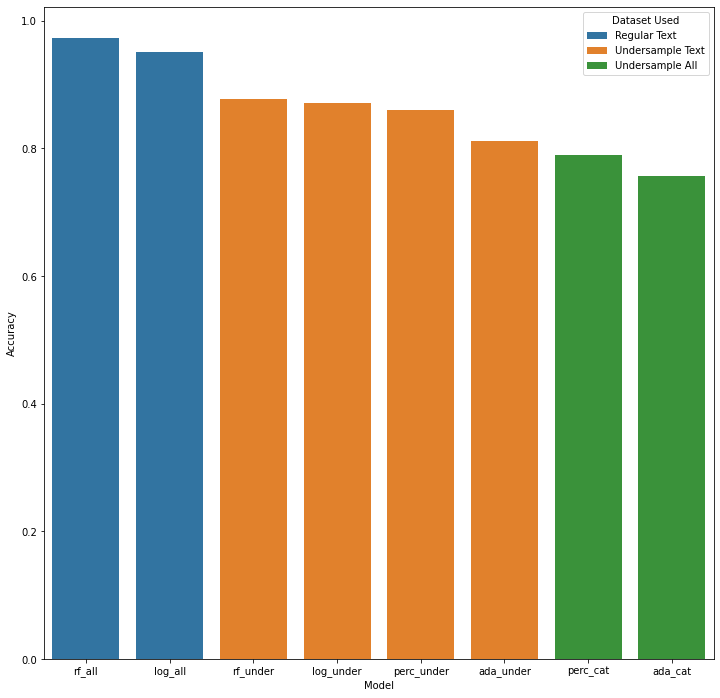

In [ ]:
Results_acc = Results.sort_values(by=['Accuracy'], ascending=False)
plt.clf()
plt.figure(figsize=[12,12])
sns.barplot(x = 'Model', y = 'Accuracy', hue = 'Dataset Used', data = Results_acc, dodge=False)
plt.show()

F1 Score Plot

<Figure size 432x288 with 0 Axes>

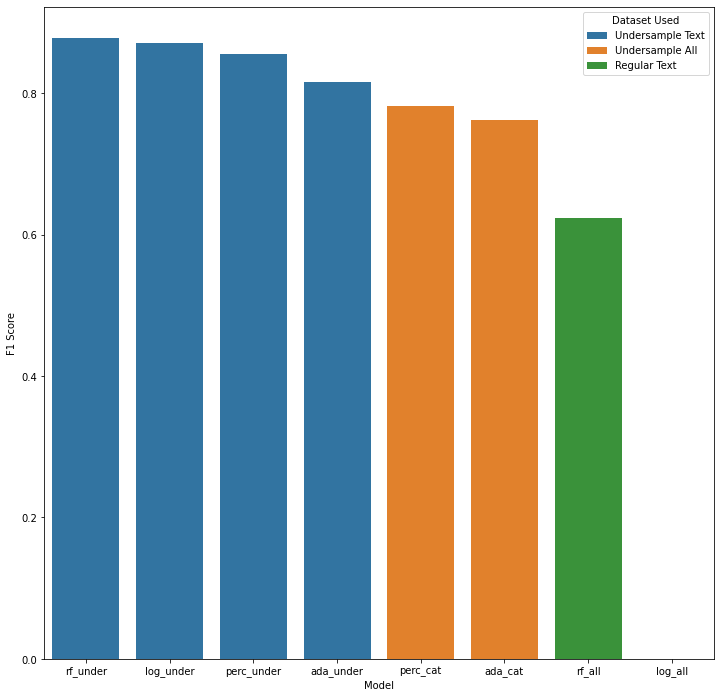

In [ ]:
Results_f1 = Results.sort_values(by=['F1 Score'], ascending=False)
plt.clf()
plt.figure(figsize=[12,12])
sns.barplot(x = 'Model', y = 'F1 Score', hue = 'Dataset Used', data = Results_f1, dodge=False)
plt.show()